# Investigating Patient Appointment Data

Kaggle Data Page: https://www.kaggle.com/joniarroba/noshowappointments

Report Date: 5/12/2021

# Table of Contents

* Introduce
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Introduce

In this project, we will be investigating data that comes from more than 100,000 records of appointments at various hospitals and health clinics in Brazil. Our response variable or target feature of interest for each record is the 'No-show' which tells us if the patient who the particular appointment was for showed up at the scheduled time or not.

In [3]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

## Data Wrangling

In [4]:
# Let's read in the data using pandas 'read_csv()' function
data = pd.read_csv('KaggleV2-May-2016.csv')

In [5]:
# Let's explore the first few lines of the dataset
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The 'PatientId', 'ScheduledDay' and 'AppointmentDay' need to be formatted to reflect their correct data types.'No-show' column will be our dependent or output variable and currently it is a Categorial variable with 'Yes' or 'No' for values. This must be converted to a binary value of '0's and '1's so that we can use it for exploratory visualization.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We see that none of the 14 columns have any null values. Many other columns show up as 'objects' but we need to look at it more carefully to see if we need to explicitly convert them to the most appropriate data types.

In [8]:
# Check to see if there are any duplicated rows
data.duplicated().value_counts()

False    110527
dtype: int64

There seem to be no duplicated rows in this dataset of 110527 rows.

In [9]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
data.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Cleaning

In [11]:
#change all column names to lower case so that it is easier for us to remember and reference the columns
data.columns = map(lambda x: x.lower(), list(data.columns))

In [12]:
#convert patientid and appointmentid to integers
data.patientid = data.patientid.astype(int)
data.appointmentid = data.appointmentid.astype(int)

In [13]:
#use the drop function to drop the row by index
data.drop([99832], inplace= True)

In [14]:
# let's make sure that the record has been dropped
data.query('age==-1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [15]:
# create new columns with binary values as proxy columns for no-shows and gender respectively
data['no_show_binary'] = data['no-show'].apply(lambda x: 1 if x == 'Yes' else 0)
data['gender_binary'] = data['gender'].apply(lambda x: 1 if x == 'M' else 0)

## Exploratory Data Analysis

In [16]:
data['no-show'].value_counts()

No     88207
Yes    22319
Name: no-show, dtype: int64

Just as an ineteresting observation, from the step above we see that the proportion of no-shows is approximately 4 times higher than the shows.



## 1. Does being older or younger affect no-shows?

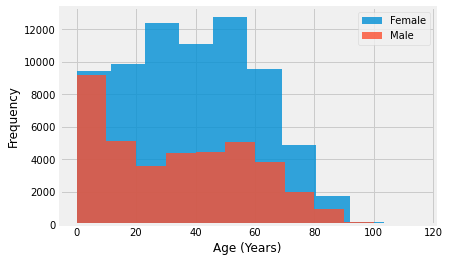

In [17]:
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
data.query('gender=="F"')['age'].plot(kind='hist', label= 'Female', alpha= 0.8);
data.query('gender=="M"')['age'].plot(kind='hist', label= 'Male', alpha= 0.8);
plt.legend()

<AxesSubplot:xlabel='no-show', ylabel='Mean Age (Years)'>

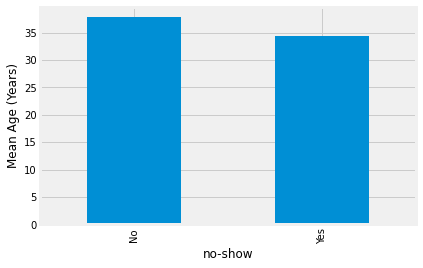

In [18]:
plt.xlabel('No-Show')
plt.ylabel('Mean Age (Years)')
data.groupby('no-show')['age'].mean().plot(kind= 'bar')

In [19]:
data.groupby('no-show')['age'].mean()

no-show
No     37.790504
Yes    34.317667
Name: age, dtype: float64

In the first plot above, we look at the age distribution of males and females. Looks like the female patients are on average older than the male patients. In the second plot, we can see that the average age of those patients who showed up is slightly higher than those patients with no-shows.



## 2. Does gender affect no-shows?

In [20]:
# count the no-shows by the female gender
genF= data.query('gender=="F"')['no-show'].value_counts()

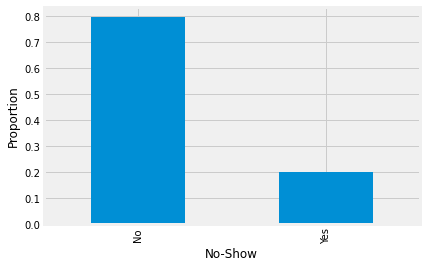

In [21]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
genF.apply(lambda x: x/genF.sum()).plot(kind='bar');

In [22]:
# count the no-shows by the male gender
genM= data.query('gender=="M"')['no-show'].value_counts()

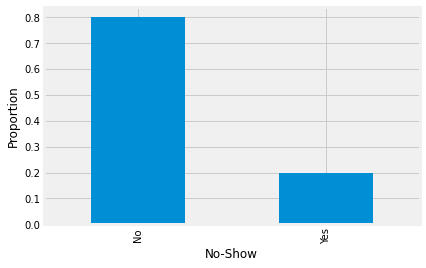

In [23]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
genM.apply(lambda x: x/genM.sum()).plot(kind='bar');

In trying to answer this question, let's see if being male or female affects the no-show rate. We find the proportion of no-shows for both male patients and female patients and compare them. From both the plots above, we see that proportion of no-shows is almost the same for both males and females at nearly 20%.



## 3. Does being an alcoholic affect patient no-shows?

In [24]:
# Count the no-shows by patients who are alcoholics 
alc1= data.query('alcoholism==1')['no-show'].value_counts()

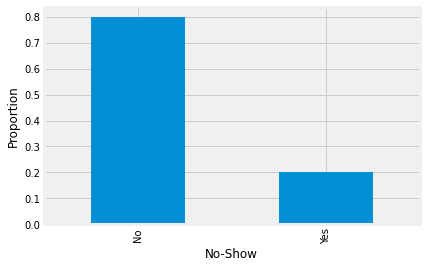

In [25]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
alc1.apply(lambda x: x/alc1.sum()).plot(kind='bar');

In [26]:
# Count the no-shows by patients who are not alcoholics 
alc0= data.query('alcoholism==0')['no-show'].value_counts()

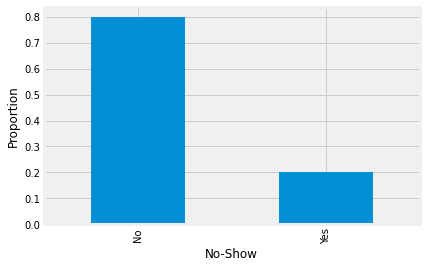

In [27]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
alc0.apply(lambda x: x/alc0.sum()).plot(kind='bar');

The two plots above do not lead us to believe that the proportion of no-shows is affected by wether a patient is an alcoholic or not. Infact the proportion of no-shows is nearly the same at 20% for both alcoholics and non-alcoholics.

In [28]:
# Count the no-shows by patients who are part of the welfare program 
sc1= data.query('scholarship==1')['no-show'].value_counts()

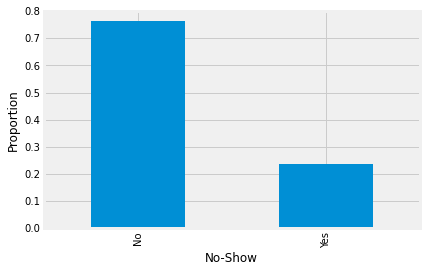

In [30]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
sc1.apply(lambda x: x/sc1.sum()).plot(kind='bar');

In [31]:
# Count the no-shows by patients who are not part of the welfare program 
sc0= data.query('scholarship==0')['no-show'].value_counts()

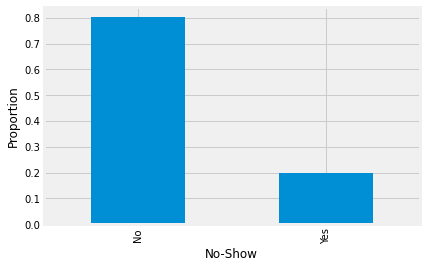

In [32]:
plt.xlabel('No-Show')
plt.ylabel('Proportion')
sc0.apply(lambda x: x/sc0.sum()).plot(kind='bar');

Comparing the two plots it's clear that patients with scholarships have a 25% chance of not showing up while the patients without scholarships the chance of no-show is lower at 20%. That's a 5% difference!

## 5. Does being from a specefic neighborhood affect no-shows?

In [33]:
# Unique number of neighborhoods that the patients come from
data['neighbourhood'].nunique()

81

There are 81 unique neighborhoods represented in this dataset. In the next steps let's visualize the appointments by these neighborhoods.

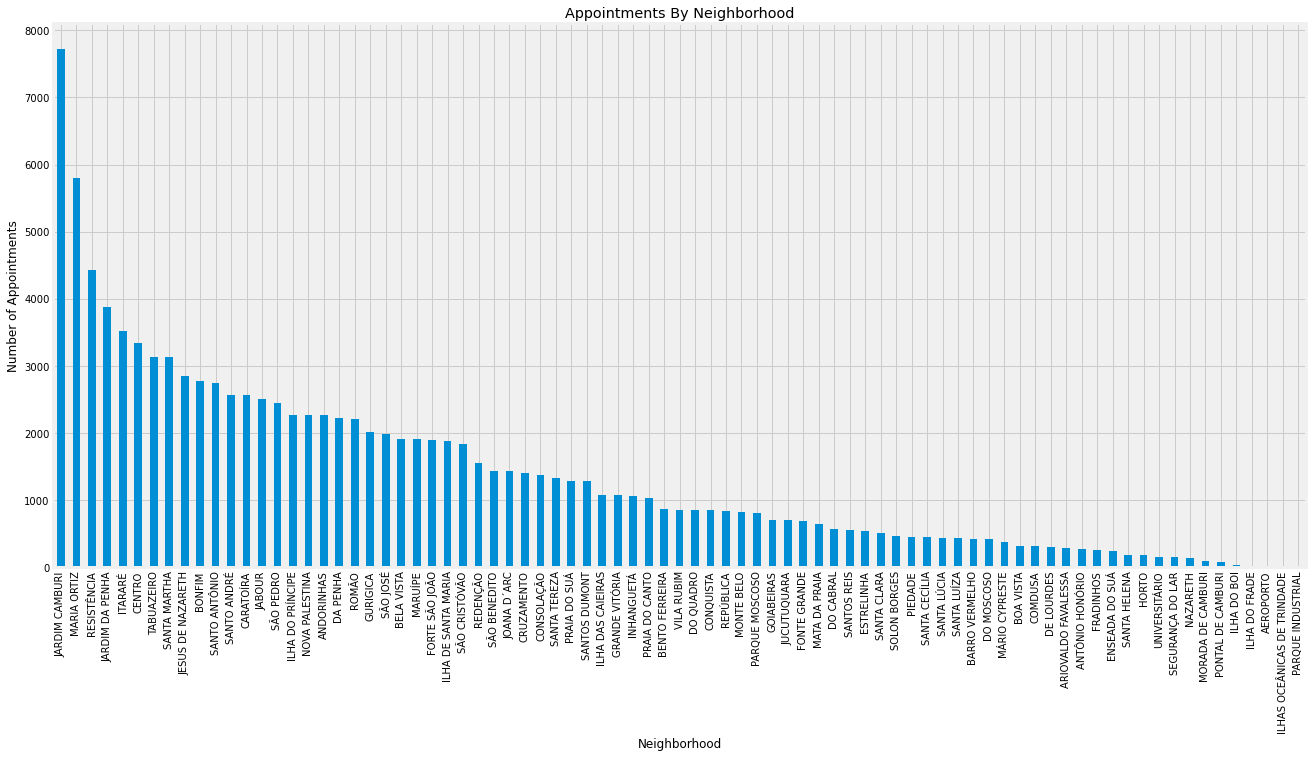

In [34]:
plt.figure(figsize= (20,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Appointments')
data['neighbourhood'].value_counts().plot(kind='bar', title= 'Appointments By Neighborhood');


We use the above plot to get an idea of the distribution of the numbers of appointments by all teh neighborhoods represented in this dataset. In the next steps, let's calculate the proportion of no-shows by the neighborhoods.

In [35]:
# Calculate the counts of shows and no-shows for each neighborhood
area1= data.groupby('neighbourhood')['no-show'].value_counts()

In [36]:
# Calculate the proportion of no-shows and shows for each neighborhood
a_proportions = area1.groupby(level= [0]).apply(lambda x: x/x.sum())

In [37]:
# View the results
a_proportions

neighbourhood    no-show
AEROPORTO        No         0.875000
                 Yes        0.125000
ANDORINHAS       No         0.769673
                 Yes        0.230327
ANTÔNIO HONÓRIO  No         0.815498
                              ...   
TABUAZEIRO       Yes        0.182950
UNIVERSITÁRIO    No         0.789474
                 Yes        0.210526
VILA RUBIM       No         0.834313
                 Yes        0.165687
Name: no-show, Length: 160, dtype: float64

In [38]:
# We are only in the no-shows for each neighborhood, so drop the 'No' rows in the 'no-show' column
a_p2= pd.DataFrame(a_proportions.drop('No', level= 'no-show'))

In [39]:
# Rename the column for the proportions and then convert the multiple index to columns in the data frame
a_p2.columns= ['no-show_prop']
a_p2.reset_index(inplace= True)

In [40]:
# Only keep the nighborhood column and the proportion values
a_p2= a_p2[['neighbourhood', 'no-show_prop']]

# Set the neighborhood back to the index in preparation for visualization
a_p2.set_index('neighbourhood', inplace= True)

# Sort the proportion values in descending order
a_p2.sort_values(by= 'no-show_prop', ascending= False, inplace= True)

<Figure size 1440x720 with 0 Axes>

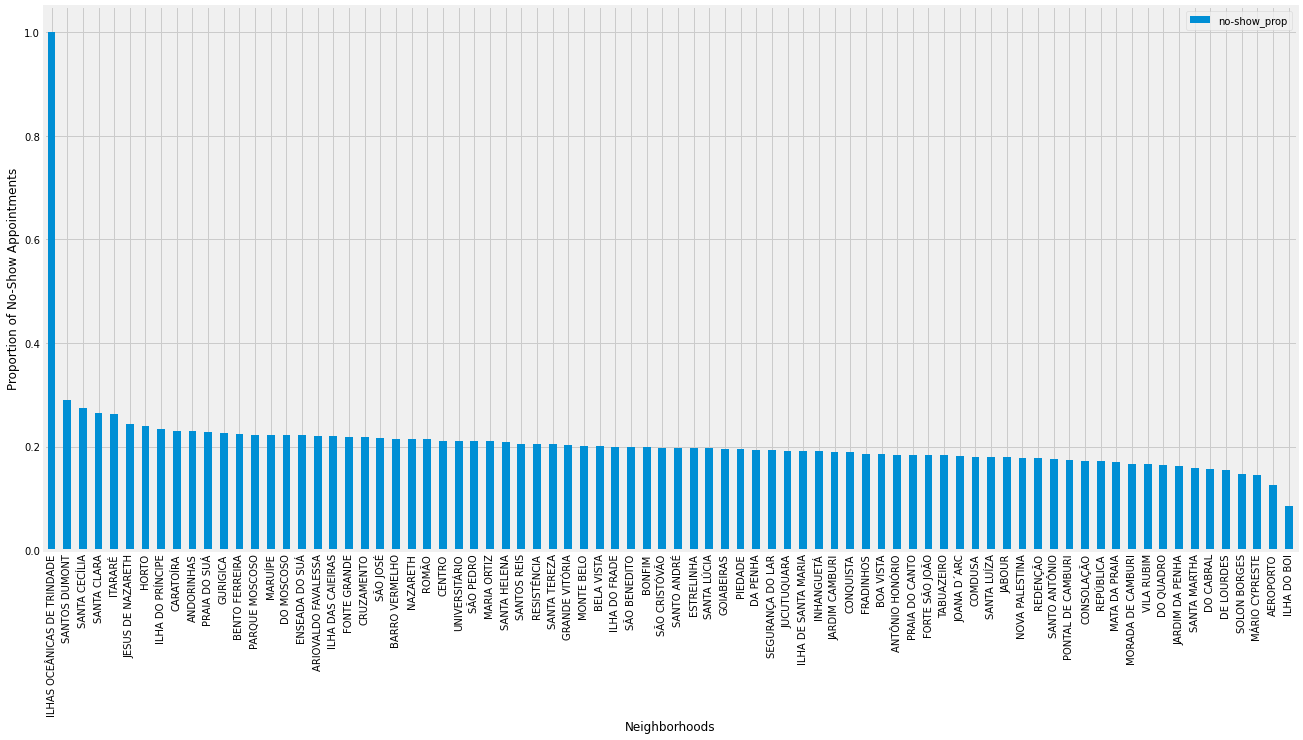

In [41]:
# Create a barchart to visualize the proportion of no-shows for each neighborhood
plt.figure(figsize= (20,10));
a_p2.plot.bar(figsize= (20,10), use_index= True);
plt.xlabel('Neighborhoods');
plt.ylabel('Proportion of No-Show Appointments');

It is clear from the above plot that the probability of no-shows varies by the neighborhood in which the patient lives in.

# Conclusions

Does Age Affect No-Shows? We found that no-show appointments tend to have patients who are on average 3 years younger than those patients who do show up for their appointments.

Does Gender Affect No-Shows? Our analysis doesn't suggest that gender has any significant effect on the no-shows since the proportion of no-shows remains constant at 20% for both Males and Females.

Does Alcoholism Affect No-Shows? Here as well, the proportion of No-Shows remains constant at 20% for both alcoholic and non-alocholic patients suggesting that this feature doesn't adversely affect the no-shows.

Does Having A Welfare Scholarship Affect No-Shows? From our analysis, we found that those patients who are part of the welfare program are 5% more likely to not show up for their appointments.

Does The Patient's Neighborhood Affect No-Shows? It is very apparent from our analysis that some neighborhoods have a very high proportion of patients who didn't show up for their appointments, while some other neighborhoods have a lower proportion of no-shows. This could be a very interesting label to test while model-building.

From the data we have, it looks like we could most likely build a regression model to test the strength of the relationship between the target feature and the labels. And going by the binary nature of the target variable, a logistic regression model will be most beneficical in prediciting future patient no-shows.